# Dreamclinic Client Churn

In [57]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import datetime as dt
from sklearn.linear_model import LogisticRegression
from dreamclinic_churn_functions import groupby_time, clean_df, unique_client_agg, sum_client_agg, clean_agg_df, line_plot, session_count_graph
import pickle
from sklearn.preprocessing import OneHotEncoder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
client_df = pd.read_pickle('client_df.pkl')

In [3]:
clean_client_df = clean_df(client_df)

/Users/flatironschool/dales_work/capstone/dreamclinc_customer_churn/dreamclinic_churn_functions.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['Service_Catagory'] = df['Service_Category'].fillna(value='Massage')
/Users/flatironschool/dales_work/capstone/dreamclinc_customer_churn/dreamclinic_churn_functions.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['Therapist'] = df['Therapist'].str.strip()
/Users/flatironschool/dales_work/capstone/dreamclinc_customer_churn/dreamclinic_churn_functions.py:18: SettingWithCopyWarning: 
A 

In [4]:
g = groupby_time(clean_client_df, offset_alias='M')

In [5]:
client_count_df = unique_client_agg(g)

In [6]:
client_count_df = clean_agg_df(client_count_df)

In [7]:
client_count_df.head()

,TransactionDate,therapists_employed,Address_Zip,Service_Catagory,month,client_count
0,2016-08,59,163,6,2016-08,1651
1,2016-09,55,166,5,2016-09,1670
2,2016-10,54,153,5,2016-10,1670
3,2016-11,56,158,6,2016-11,1604
4,2016-12,57,155,5,2016-12,1664


# Graph of unique client counts per month from August, 2016

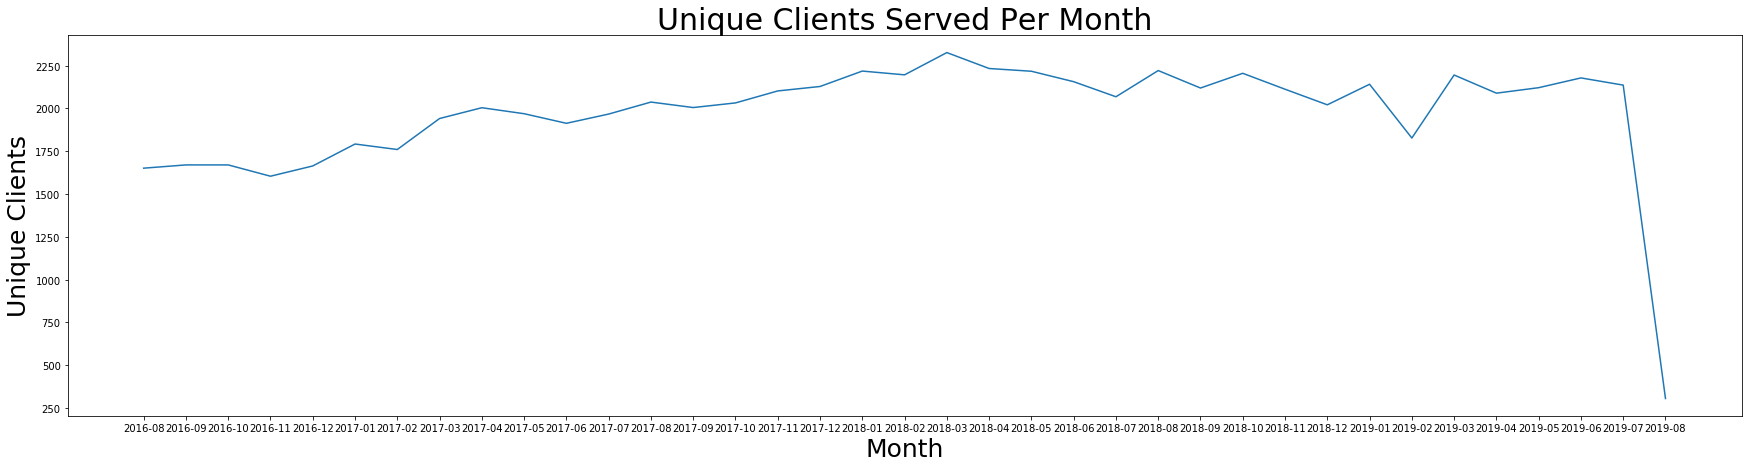

In [8]:
line_plot(df=client_count_df, 
          title='Unique Clients Served Per Month',
          x_label='Month',
          y_label='Unique Clients',
          x_column='month',
          y_column='client_count')

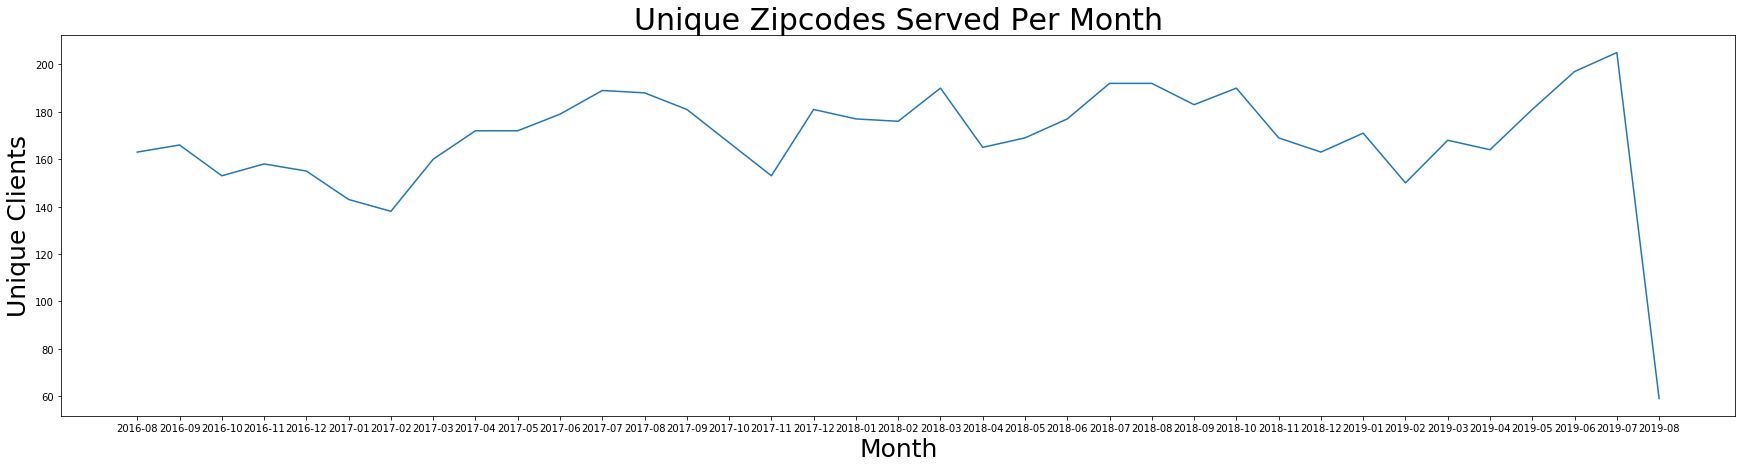

In [9]:
line_plot(df=client_count_df, 
          title='Unique Zipcodes Served Per Month', 
          x_label='Month', 
          y_label='Unique Clients',
          x_column='month',
          y_column='Address_Zip')

In [10]:
service_given_df = sum_client_agg(g)

In [11]:
service_given_df.head()

,TransactionDate,clientID,Therapist,Address_Zip,Service_Category,HrsWorked,Service_Catagory
TransactionDate,,,,,,,
2016-08,2576,2576,2576,2519,1302,2576,2576
2016-09,2607,2607,2607,2567,1322,2607,2607
2016-10,2662,2662,2662,2621,1280,2662,2662
2016-11,2648,2648,2648,2622,1172,2648,2648
2016-12,2772,2772,2772,2729,1206,2772,2772


In [12]:
service_given_df = clean_agg_df(service_given_df)

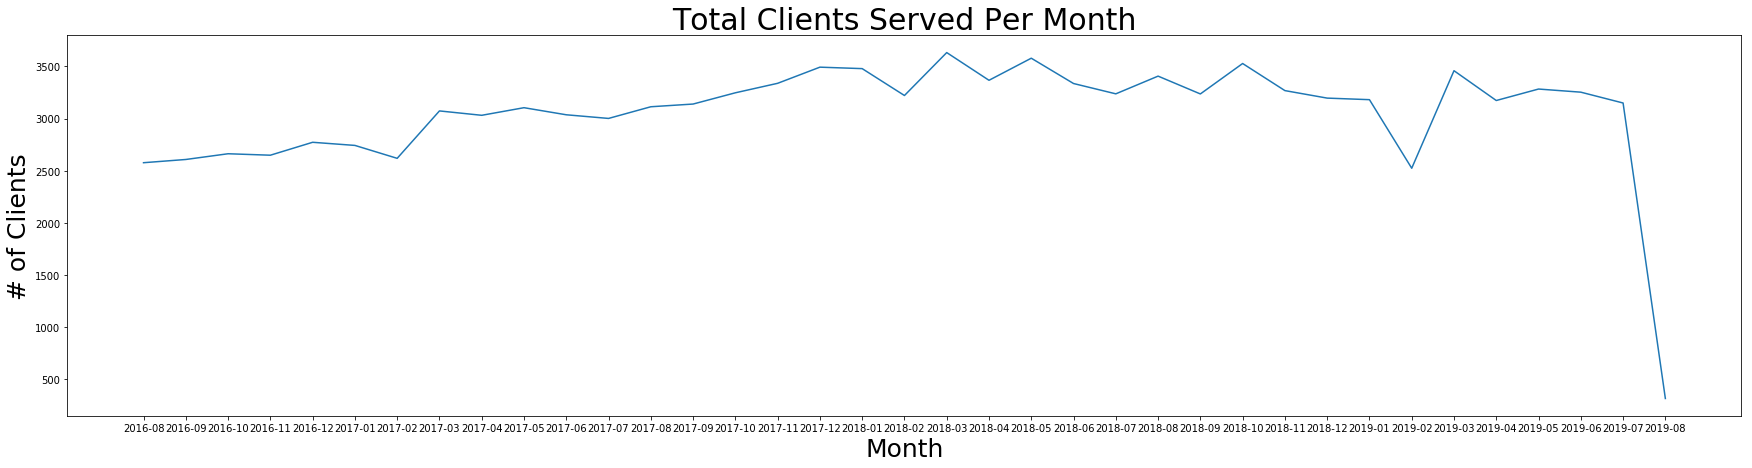

In [13]:
line_plot(df=service_given_df, 
          title='Total Clients Served Per Month', 
          x_label='Month', 
          y_label='# of Clients',
          x_column='month',
          y_column='Service_Catagory')

The average number of sessions a client recieves is ~5.5.

The highest number of massages received is 175 by the CEO of the company


In [14]:
session_count = client_df.groupby('clientID').nunique()['TransactionDate']

<function matplotlib.pyplot.show(*args, **kw)>

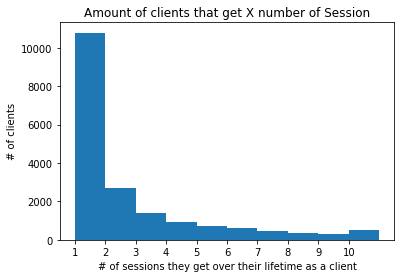

In [15]:
session_count_graph(session_count=session_count, min_sessions=1, max_sessions=10)

## The average client get 5.5 sessions and sees 2.5 different therapists.
## People tend to get 1.25 hour sessions which is almost split between the 1h and 1.5h offerings we have.

In [16]:
client_df.groupby('clientID').nunique().mean()

TransactionDate     5.462503
clientID            1.000000
Therapist           2.605174
Address_City        0.907621
Address_State       0.907481
Address_Zip         0.898439
Invoice_Category    1.119506
Service_Category    0.887579
HrsWorked           1.375670
dtype: float64

In [17]:
from dreamclinic_churn_functions import temporal_split

# Mark Clients with Churned or Not Churned for further modeling

In [18]:
churn_df = temporal_split(df=client_df)

/Users/flatironschool/dales_work/capstone/dreamclinc_customer_churn/dreamclinic_churn_functions.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  not_churn_df['churn'] = False


In [19]:
churn_df['Service_Category'].replace(np.nan, 'Massage', inplace=True)

In [64]:
cleaned_churn_df = churn_df.dropna()

In [58]:
ohe = OneHotEncoder()

In [71]:
# test_df = test_df.dropna()
# train_df = train_df.dropna()

In [74]:
ohe.fit(train_df[['Therapist', 'Address_Zip']])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [75]:
ohe_train_df = ohe.transform(train_df[['Therapist', 'Address_Zip']]).todense()

In [82]:
ohe_therapist_zip_df = pd.DataFrame(ohe_train_df, columns=ohe.get_feature_names())

In [83]:
ohe_therapist_zip_df.columns

Index(['x0_Abby Thomson', 'x0_Abigail Thomson', 'x0_Alexa Primozich',
       'x0_Alexandra Boucher', 'x0_Alisa Popova', 'x0_Alison Post',
       'x0_Amanda Hand', 'x0_Amanda Keen', 'x0_Amanda Scott', 'x0_Amy Ross',
       ...
       'x1_UK', 'x1_V1Z 2T7', 'x1_V6B0E6', 'x1_V6J2E6', 'x1_V7L3E8',
       'x1_V7V2H8', 'x1_V8P1A5', 'x1_VIY6Y7', 'x1_VSK 153 Canada', 'x1_WA'],
      dtype='object', length=1647)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
def temporal_test_split(churn_df,
                        start_year=2018, 
                        start_month=12, 
                        start_day=1, 
                        end_year=2019, 
                        end_month=5, 
                        end_day=31):
    
    """needs churn_df, outputs temporal test_df for train_test_split"""# Temporal test split
    start = churn_df['TransactionDate'].searchsorted(dt.datetime(start_year, start_month, start_day))
    end = churn_df['TransactionDate'].searchsorted(dt.datetime(end_year, end_month, end_day))
    test_df = churn_df.iloc[start:end]
    return test_df
test_df = temporal_test_split(churn_df)

In [22]:
def temporal_train_split(churn_df, 
                         end_year=2018, 
                         end_month=11, 
                         end_day=30):
    #Temporal train split
    end = churn_df['TransactionDate'].searchsorted(dt.datetime(end_year, end_month, end_day))
    train_df = churn_df.iloc[:end]
    return train_df
train_df = temporal_train_split(churn_df)

In [23]:
def aggregate(df, unique_col='clientID', to_aggregate=['TransactionDate', 'Therapist', 'Service_Category']):
    aggregated_df = df.groupby(unique_col).nunique()
    aggregated_df = aggregated_df[to_aggregate]
    return aggregated_df

train_agg_df = aggregate(train_df)
test_agg_df = aggregate(test_df)

In [24]:
churn_df_id_churn = churn_df[['clientID', 
                              'churn']]

In [25]:
# churn or not df for all client IDS, useful for merging
churn_df_id_churn.drop_duplicates(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
test_merge_df = test_agg_df.merge(churn_df_id_churn, 
                                    how='inner', 
                                    right_on='clientID', 
                                    left_index=True)
test_merge_df.reset_index(inplace=True)
test_merge_df.drop('index', axis=1, inplace=True)

In [27]:
train_merge_df = train_agg_df.merge(churn_df_id_churn, 
                                      how='inner', 
                                      right_on='clientID', 
                                      left_index=True)
train_merge_df.reset_index(inplace=True)
train_merge_df.drop('index', axis=1, inplace=True)
train_target = train_merge_df['churn']

In [28]:
X_train = train_merge_df[['TransactionDate', 'Therapist', 'Service_Category']]
y_train = train_merge_df['churn']
X_test =  test_merge_df[['TransactionDate', 'Therapist', 'Service_Category']]
y_test = test_merge_df['churn']

In [29]:
log_reg = LogisticRegression()

In [30]:
log_reg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
X_train.head()

,TransactionDate,Therapist,Service_Category
0,142,107,3
1,1,1,1
2,1,1,1
3,3,2,1
4,2,2,1


In [31]:
# first model is barely better then just guessing the mean
log_reg.score(X_test, y_test)

0.6823273179838207

In [32]:
y_test.mean()

0.6810827629122589

In [33]:
X_prob = log_reg.predict_proba(X_test)[:, -1]

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

In [35]:
roc_auc_score(y_test, X_prob)

0.7858039086786484

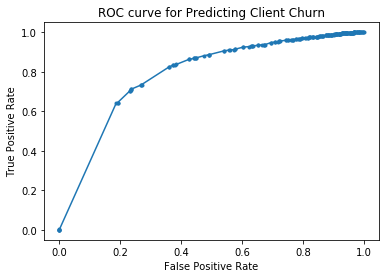

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, X_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Predicting Client Churn")
plt.show();

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, X_prob)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
predictions_df = pd.DataFrame(log_reg.predict_proba(X_test))

In [40]:
predictions_df['prediction'] = 0

In [41]:
predictions_df['prediction'] = predictions_df[1] >= .9

In [42]:
confusion_matrix(y_test, predictions_df['prediction'])

array([[ 578, 1472],
       [ 206, 4172]])

In [43]:
y_pred = predictions_df['prediction']

In [44]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 578 1472]
 [ 206 4172]]


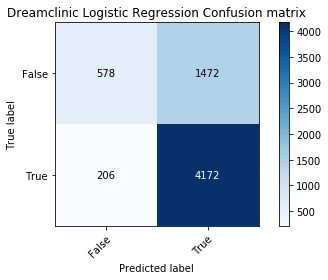

In [45]:
plot_confusion_matrix(y_test, y_pred, [False, True],
                          normalize=False,
                          title='Dreamclinic Logistic Regression Confusion matrix',
                          cmap=plt.cm.Blues)

In [46]:
ten_or_more_ids = session_count[session_count > 9]
ten_or_more_ids = ten_or_more_ids.T
client_history_10_more_df = client_df.merge(ten_or_more_ids, how='right', left_on='clientID', right_index=True)
client_history_10_more_df.reset_index(inplace=True)

In [47]:
log_reg.predict_proba(X_test)

array([[0.51266739, 0.48733261],
       [0.0575956 , 0.9424044 ],
       [0.06905418, 0.93094582],
       ...,
       [0.0575956 , 0.9424044 ],
       [0.0575956 , 0.9424044 ],
       [0.0575956 , 0.9424044 ]])

In [48]:
client_history_10_more_df = client_df.merge(ten_or_more_ids, how='right', left_on='clientID', right_index=True)
client_history_10_more_df.reset_index(inplace=True)

In [49]:
client_history_10_more_df

,index,TransactionDate_x,clientID,Therapist,Address_City,Address_State,Address_Zip,Invoice_Category,Service_Category,HrsWorked,TransactionDate_y
0,0,2016-08-02,40156.0,Michael Jacobus,Seattle,Wa,98109,Clinic_Ins,NaN,1.0,20
1,1603,2016-08-19,40156.0,Rilla Al-Haddar,Seattle,Wa,98109,Clinic_Ins,NaN,1.0,20
2,2244,2016-08-26,40156.0,Rilla Al-Haddar,Seattle,Wa,98109,Clinic_Ins,NaN,1.0,20
3,5791,2016-10-05,40156.0,Rilla Al-Haddar,Seattle,Wa,98109,Clinic_Ins,NaN,1.0,20
4,7969,2016-10-28,40156.0,Rilla Al-Haddar,Seattle,Wa,98109,Clinic_Ins,NaN,1.0,20
5,8501,2016-11-04,40156.0,Rilla Al-Haddar,Seattle,Wa,98109,Clinic_Ins,NaN,1.0,20
6,9234,2016-11-11,40156.0,Rilla Al-Haddar,Seattle,Wa,98109,Clinic_Ins,NaN,1.0,20
7,10117,2016-11-21,40156.0,Stefanie Smith,Seattle,Wa,98109,Clinic_Ins,NaN,1.0,20
8,14138,2017-01-02,40156.0,Abigail Thomson,Seattle,Wa,98109,Clinic_Ins,NaN,1.0,20
9,14750,2017-01-08,40156.0,Dina Gosse,Seattle,Wa,98109,Clinic_Ins,Acupuncture,1.0,20


In [50]:
client_history_10_more_df.drop('index', axis=1, inplace=True)

In [51]:
client_history_10_more_df.rename({'TransactionDate_y' : 'session_count', 'TransactionDate_x' : "date"}, axis=1, inplace=True)

In [52]:
client_history_10_more_df['since_last'] = None

In [53]:
# finds interval lengths for clients who have been in at least 10 times,  O(n) time O(n) space
interval = []
for i in range(0, len(client_history_10_more_df)):
    if client_history_10_more_df.iloc[i]['clientID'] == id:
        diff = client_history_10_more_df.iloc[i]['date'] - client_history_10_more_df.iloc[i-1]['date']
        interval.append(diff)
    else:
        id = client_history_10_more_df.iloc[i]['clientID']
        interval.append(0)

client_history_10_more_df['since_last'] = interval

In [54]:
client_history_10_more_df['since_last'][0].days

AttributeError: 'int' object has no attribute 'days'

In [ ]:
def extract_day(x):
    """extract day from the element."""
    if isinstance(x, int):
        return x
    else:
        return x.days

In [ ]:
client_history_10_more_df["clean_since_last"] = client_history_10_more_df['since_last'].apply(extract_day)

In [ ]:
grouped_df = client_history_10_more_df.groupby('clientID')['clean_since_last'].mean()

In [ ]:
first_time_df = pd.DataFrame(client_df.groupby('clientID')['TransactionDate'].min())

In [ ]:
first_time_df['month'] = first_time_df['TransactionDate'].dt.month

In [ ]:
first_time_df['year'] = first_time_df['TransactionDate'].dt.year

In [ ]:
count_first_time_by_month_df = first_time_df.groupby(['year', 'month']).count()

In [ ]:
count_first_time_by_month_df.reset_index(inplace=True)

In [ ]:
count_first_time_by_month_df['datetime']= pd.to_datetime(count_first_time_by_month_df['year'].astype(str) + count_first_time_by_month_df['month'].astype(str), format='%Y%m')

In [ ]:
fig, ax = plt.subplots(figsize=(30,7))
sns.lineplot(count_first_time_by_month_df['datetime'], count_first_time_by_month_df['TransactionDate'])
plt.xlabel('Month')
plt.ylabel('# of new clients')
plt.title("New clients by month for the last 3 years");

In [ ]:
first_time_df = clean_client_df.groupby('clientID').min()

In [ ]:
zip_code_count = first_time_df['Address_Zip'].value_counts()

In [ ]:
zip_code_count_df = pd.DataFrame([zip_code_count]).T

In [ ]:
zip_code_count_df

In [ ]:
sns.barplot(x=zip_code_count_df[zip_code_count_df['Address_Zip'] > 400].index, y=zip_code_count_df[zip_code_count_df['Address_Zip'] > 400]['Address_Zip'])

In [ ]:
plt.hist(zip_code_count_df[zip_code_count_df['Address_Zip'] > 400])


In [85]:
clean_client_df.drop('Service_Category', axis=1, inplace=True)

In [89]:
clean_client_df.drop('Servive_Catagory', axis=1, inplace=True)

KeyError: "['Servive_Catagory'] not found in axis"

In [ ]:
ohe